<a href="https://colab.research.google.com/github/Dkepffl/2022-1-ESAA/blob/main/MiniProject/Mini_Project_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니프로젝트 YB 4조 : Movies

## 라이브러리 및 데이터 불러오기
___




### 1. Import the necessary libraries

In [2]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,262 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' #matplotlib 한글 깨짐 방지

# 출력 결과를 셀 아래 inline으로 표시
%matplotlib inline

### 2. Import the dataset and assign it to a variable called 'movies'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import data
movies = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/DataSet/movies_train.csv')

## 탐색적 자료 분석(EDA)
___

### 1. See the first 10 entries

In [ ]:
movies.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


### 2. See the information of dataframe 'movies'

In [ ]:
# 데이터프레임의 크기 확인
print(movies.shape)

(600, 12)


In [ ]:
# 데이터프레임의 정보 조회
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


### 3. Summarize the dataframe 'movies'

In [ ]:
movies.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


### 4. Chech if there is any Nan and fill the value of NaN if it is

In [ ]:
# 결측값의 개수 확인
movies.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
# 결측값의 특성 확인
# NaN인 값만 출력하도록 불린 인덱싱 사용
movies[movies['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들인 것을 확인할 수 있다.
- 감독의 이전 작품이 존재하지 않을 경우, dir_prev_bfnum의 값이 NaN임을 알 수 있다.
- 따라서 NaN 값을 0으로 바꿔준다.

In [4]:
# 결측치 메우기
movies['dir_prev_bfnum'].fillna(0, inplace = True)

### 5. Change the datatype of 'release_time' into type of 'datetime'

In [5]:
# release_time의 데이터 타입 확인하기
movies.dtypes

title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
dtype: object

In [6]:
# datatime 형식으로 변환
movies['release_time'] = pd.to_datetime(movies['release_time'])

In [7]:
# 확인하기
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


## 데이터 시각화 및 분석
___

### **1. 장르에 따른 스탭 수**
  - 사용한 변수 : `genre`, `num_staff` 

In [ ]:
# 장르 별 평균 스탭 수 구하기
staff_genre = movies[['genre','num_staff']].groupby('genre').mean()
staff_genre.sort_values('num_staff', ascending = False, inplace = True)

<Figure size 432x288 with 0 Axes>

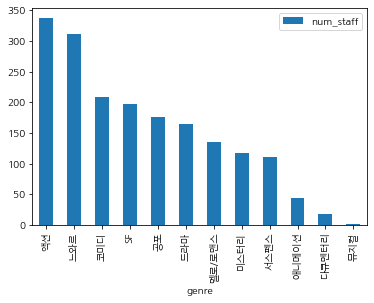

In [ ]:
# 히스토그램 그리기
plt.figure()
staff_genre.plot(kind = 'bar')
plt.show()

 ##### | 분석 결과
 ___
> 영화 세트 설치에 많은 인력이 든다고 생각하여 액션, 느와르, 공포 장르의 스텝 수가 많을 것이라고 예상하였는데 실제로 액션 장르, 느와르 장르 등의 스탭 수가 많다.

### **2. 연도별 장르당 평균 관객 수**
  - 사용한 변수 : `release_time`, `genre`, `box_off_num` 

In [ ]:
# 연도별 장르당 평균 관객 수를 확인하기 위해, 개봉년도를 추가적인 칼럼으로 설정
movies['release_year'] = movies['release_time'].dt.year

# 개봉년도, 장르를 기준으로 평균 관객 수 계산, 이를 새로운 데이터 프레임으로 설정
popular_genre = movies.groupby(['release_year', 'genre'])['box_off_num'].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '평균 관객 수')

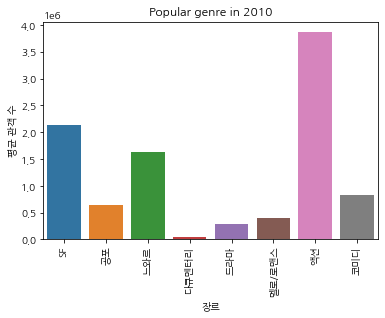

In [ ]:
# 개봉년도와 장르를 기준으로 평균 관객 수를 확인
popular_genre = movies.groupby(['release_year', 'genre'])['box_off_num'].mean()

# 2010년도에 평균 관객 수가 많았던 장르
ax = sns.barplot(popular_genre[2010].index, popular_genre[2010].values)      # 액션, SF, 느와르 순
plt.xticks(rotation=90)
ax.set_title('Popular genre in 2010')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객 수')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '평균 관객 수')

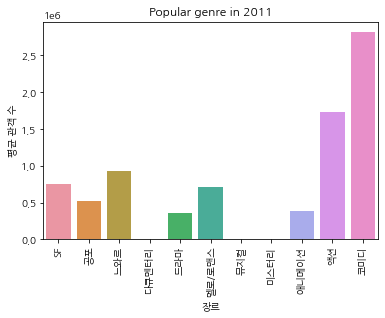

In [ ]:
# 2011년도에 평균 관객 수가 많았던 장르
ax = sns.barplot(popular_genre[2011].index, popular_genre[2011].values)    # 코미디, 액션 순
plt.xticks(rotation=90)
ax.set_title('Popular genre in 2011')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객 수')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '평균 관객 수')

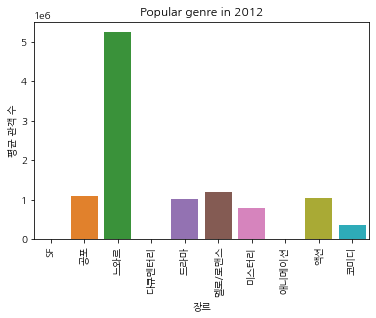

In [ ]:
# 2012년도에 평균 관객 수가 많았던 장르
ax = sns.barplot(popular_genre[2012].index, popular_genre[2012].values)    # 느와르가 압도적
plt.xticks(rotation=90)
ax.set_title('Popular genre in 2012')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객 수')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '평균 관객 수')

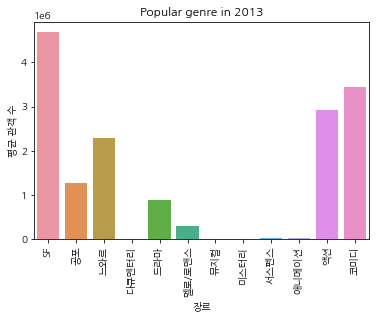

In [ ]:
# 2013년도에 평균 관객 수가 많았던 장르
ax = sns.barplot(popular_genre[2013].index, popular_genre[2013].values)    # SF, 코미디, 액션 순
plt.xticks(rotation=90)
ax.set_title('Popular genre in 2013')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객 수')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '평균 관객 수')

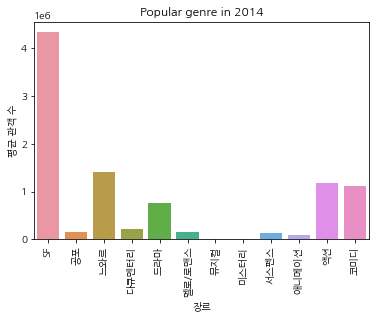

In [ ]:
# 2014년도에 평균 관객 수가 많았던 장르
ax = sns.barplot(popular_genre[2014].index, popular_genre[2014].values)    # SF가 압도적
plt.xticks(rotation=90)
ax.set_title('Popular genre in 2014')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객 수')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '평균 관객 수')

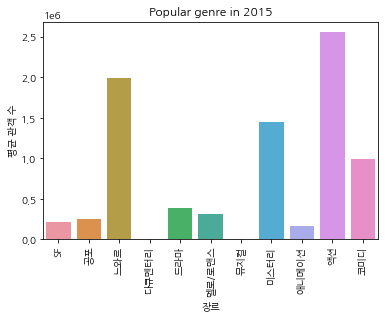

In [ ]:
# 2015년도에 평균 관객 수가 많았던 장르
ax = sns.barplot(popular_genre[2015].index, popular_genre[2015].values)    # 액션, 느와르, 미스터리 순
plt.xticks(rotation=90)
ax.set_title('Popular genre in 2015')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객 수')

 ##### | 분석 결과
 ___
- 연도별 인기 장르
  - 2010년 : 액션, SF, 느와르
  - 2011년 : 코미디, 액션
  - 2012년 : 느와르가 압도적
  - 2013년 : SF, 코미디, 액션
  - 2014년 : SF가 압도적
  - 2015년 : 액션, 느와르, 미스터리
- **연도별로 차이는 있으나, 전반적으로 액션과 느와르, SF 장르의 영화가 관객들에게 꾸준히 인기를 얻고 있는 것으로 보인다.**


### **3. 감독별 이전 영화의 관객 수와 현 영화의 관객 수 사이의 관계**
  - 사용한 변수 : `director`, `dir_prev_bfnum`, `box_off_num`

In [ ]:
# 감독별로 이전 영화의 총 관객 수와 현재 영화의 총 관객 수를 출력
df = movies.groupby('director')['dir_prev_bfnum', 'box_off_num'].sum()

# 상관관계를 정확히 파악하기 위해 이전에 영화를 만들어 본 경험이 없는, 즉 dir_prev_bfnum = 0인 감독을 제외한 데이터 프레임을 새롭게 설정
# 추가적으로, 상관관계를 정확하게 파악하는 데 혼선을 줄 수 있는 매우 작은 값(outlier)들을 제외하고자 각 칼럼에서 25% 이상인 값들만을 사용
df = df[(df['dir_prev_bfnum']!=0) & (df['dir_prev_bfnum'] > 2.085254e+04) & (df['box_off_num'] > 5.732500e+03)]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,dir_prev_bfnum,box_off_num
director,,
강우석,8.448210e+05,5094896
강형철,1.606187e+07,11469079
강효진,3.751800e+04,1214237
계윤식,1.468191e+06,101698
곽경택,3.728630e+05,3671747
...,...,...
홍상수,3.931700e+04,360637
홍원찬,2.888384e+06,441208
홍지영,6.612205e+05,1214839


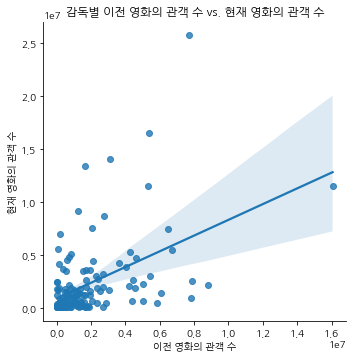

In [ ]:
# dir_prev_bfnum vs. box_off_num 그래프 출력
ax = sns.lmplot(x='dir_prev_bfnum', y='box_off_num', data=df)
ax.set(title = '감독별 이전 영화의 관객 수 vs. 현재 영화의 관객 수')
ax.set(xlabel = '이전 영화의 관객 수')
ax.set(ylabel = '현재 영화의 관객 수')

In [ ]:
# dir_prev_bfnum과 box_off_num의 상관계수 확인
df.corr()       # 0.476

,dir_prev_bfnum,box_off_num
dir_prev_bfnum,1.000000,0.476027
box_off_num,0.476027,1.000000


##### | 분석 결과
 ___
- 산점도와 상관계수를 통해, 이전 영화의 총 관객 수와 현재 영화의 관객 수 사이에는 뚜렷한 상관관계가 없음을 알 수 있다.

### **4. 이전에 만든 작품의 개수와 현 영화의 관객 수 사이의 관계**
  - 사용한 변수 : `dir_prev_num`, `box_off_num`

Text(0, 0.5, '평균 관객 수')

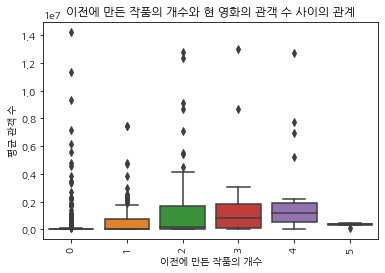

In [ ]:
ax = sns.boxplot(x='dir_prev_num', y='box_off_num', data=movies)
plt.xticks(rotation=90)
ax.set_title('이전에 만든 작품의 개수와 현 영화의 관객 수 사이의 관계')
ax.set_xlabel('이전에 만든 작품의 개수')
ax.set_ylabel('관객 수')

##### | 분석 결과
___
  - 신인 감독 (dir_prev_num = 0) 
    - 관객의 수가 매우 적은 작품부터 흥행에 성공한 작품까지 그 스펙트럼이 다양하다. (Outlier가 많이 관찰됨)
  - 영화를 1번 이상 만들어 본 감독 (dir_prev_num >= 1)
    - 일정 수준 이상의 관객 수를 확보하고 있으나, 신인 감독에 비해 흥행에 성공한 작품의 비율은 낮은 것으로 확인된다.
    - 또한, 작품 제작 경험이 많으면 안정적으로 일정 수준 이상의 관객을 확보할 확률이 높다.
  - 결론적으로 영화를 만들어 본 경험이 있다고 해서 반드시 흥행이 보장되지는 않지만, 경험이 있는 감독일수록 일정 수준 이상의 관객을 확보할 확률이 증가한다고 볼 수 있다.

### **5. 장르별 주연배우수**
- 사용한 변수 : `genre`, `num_actor`

Text(0, 0.5, '주연배우 수')

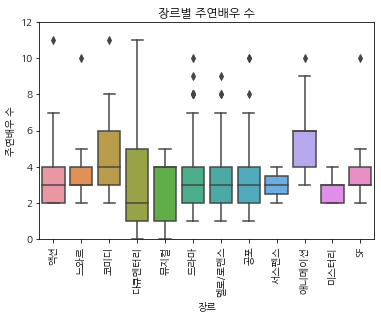

In [ ]:
ax = sns.boxplot(x=movies.genre, y=movies.num_actor)
plt.xticks(rotation=90)
plt.ylim([0, 12])
ax.set_title('장르별 주연배우 수')
ax.set_xlabel('장르')
ax.set_ylabel('주연배우 수')

In [ ]:
movies.groupby('genre').num_actor.mean().sort_values(ascending=False)

genre
애니메이션     5.666667
코미디       4.735849
공포        3.880952
SF        3.692308
드라마       3.647059
액션        3.607143
느와르       3.592593
멜로/로맨스    3.410256
다큐멘터리     3.268817
서스펜스      3.000000
미스터리      2.882353
뮤지컬       2.800000
Name: num_actor, dtype: float64

##### | 분석 결과
___
* 박스플롯과 sorting값을 통해 장르별 주연배우 수는 애니메이션, 코미디, 공포, SF, 드라마의 순으로 평균 주연 배우수가 많은 것을 알 수 있다.

### **6. 장르별 상영시간 분포**
- 사용한 변수 : `genre`, `time`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


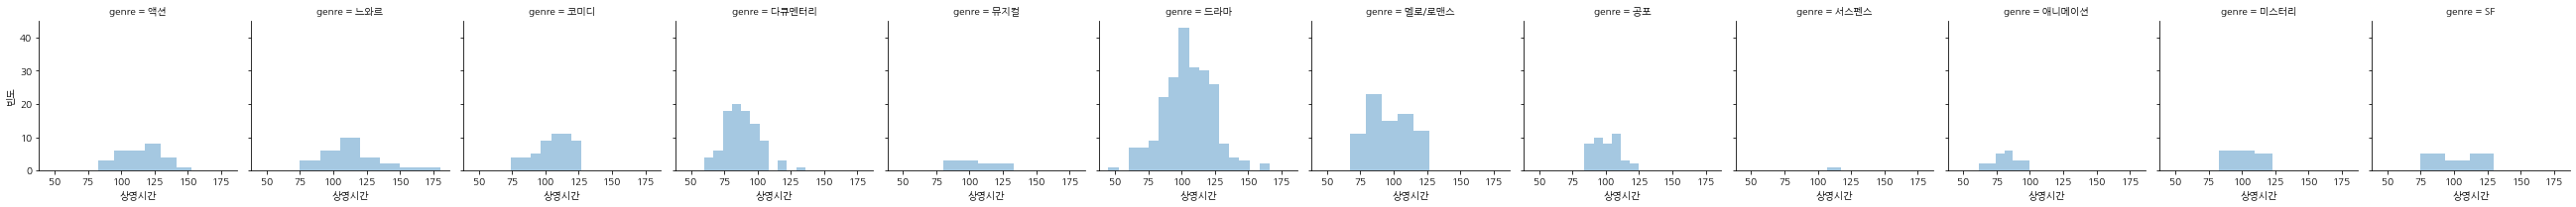

In [ ]:
facet = sns.FacetGrid(movies, col='genre')
facet.map(sns.distplot, 'time', kde=False)
facet.set_axis_labels('상영시간', '빈도')

In [ ]:
movies.groupby('genre').time.mean().sort_values(ascending=False)

genre
느와르       115.370370
액션        114.464286
서스펜스      112.000000
뮤지컬       107.000000
코미디       105.264151
드라마       104.651584
미스터리      102.588235
SF        101.384615
공포        100.214286
멜로/로맨스     96.641026
다큐멘터리      88.053763
애니메이션      82.571429
Name: time, dtype: float64

##### | 분석 결과
___
* 히스토그램과 sorting값을 통해 장르별 상영시간은 느와르, 액션, 서스펜스, 뮤지컬, 코미디의 순으로 평균 상영시간 수가 긴 것을 알 수 있다. 

### **7. 상영시간과 스탭 수의 관계**
- 사용한 변수 : `time`, `num_staff`

Text(0, 0.5, '스탭 수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


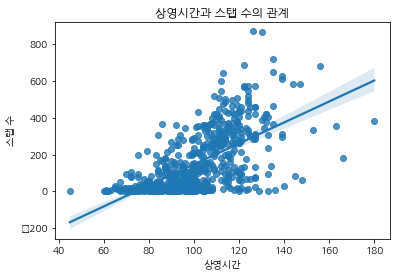

In [ ]:
ax = plt.subplots()
ax = sns.regplot(x=movies.time, y=movies.num_staff)
ax.set_title('상영시간과 스탭 수의 관계')
ax.set_xlabel('상영시간')
ax.set_ylabel('스탭 수')

##### | 분석 결과
___
* 산점도와 회귀직선을 통해 상영시간이 늘어날수록 스탭 수는 증가한다는 것을 알 수 있다. 두 변수는 정비례 관계를 보인다.

### **8. 계절별 장르와 관객수**
  - 사용한 변수 : `release_time`, `genre`, `box_off_num`

In [8]:
# 계절 구분 함수
def seasons(x):
  if ((x >= 3) & (x < 6) == True) : 
    return 'Spring'
  elif ((x >= 6) & (x < 9) == True) : 
    return  'Summer'
  elif ((x >= 9) & (x < 12) == True) : 
    return 'Fall'
  else : 
    return 'Winter'

In [9]:
# 계절 정보를 담고 있는 movies['release_season'] 추가
movies['release_month'] = movies['release_time'].dt.month
movies['release_season'] = movies['release_month'].apply(seasons)

In [10]:
# 결과 확인
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_month,release_season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,11,Fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,11,Fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,6,Summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7,Summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,11,Fall


In [11]:
# 개봉시기에 따른 장르와 평균 관객수 확인
genre_aud = movies.groupby(['release_season', 'genre'])['box_off_num'].mean()
genre_aud.sort_values( ascending = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


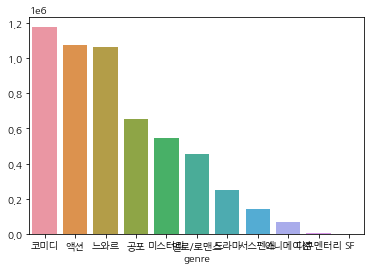

In [12]:
# 봄에 개봉한 영화의 장르 및 평균 관객 수
sns.barplot(genre_aud['Spring'].index, genre_aud['Spring'].values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


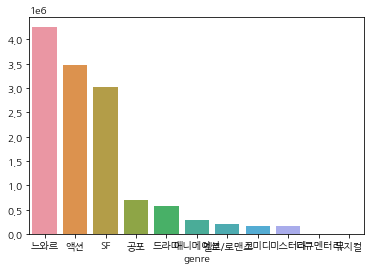

In [13]:
# 여름에 개봉한 영화의 장르 및 평균 관객 수
sns.barplot(genre_aud['Summer'].index, genre_aud['Summer'].values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


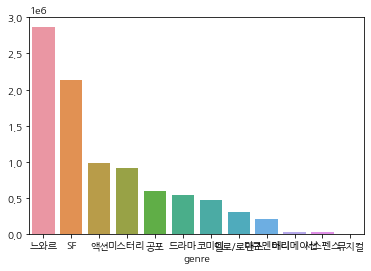

In [14]:
# 가을에 개봉한 영화의 장르 및 평균 관객 수
sns.barplot(genre_aud['Fall'].index, genre_aud['Fall'].values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


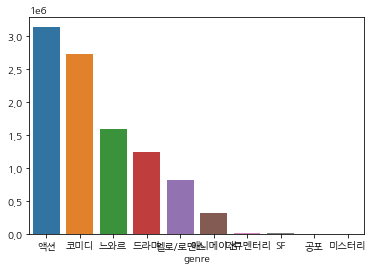

In [15]:
# 겨울에 개봉한 영화의 장르 및 평균 관객 수
sns.barplot(genre_aud['Winter'].index, genre_aud['Winter'].values)

##### | 분석 결과
___
- **계절별 관객 수가 많은 장르**
  1. 봄 : 코미디 > 공포 > 미스터리
  2. 여름 : 느와르 > SF > 공포
  3. 가을 : 느와르 > 액션 > 공포
  4. 겨울 : 액션 > 코미디 > 느와르

### **9. 상영등급별 관객수**
  - 사용한 변수 : `screening_rat`, `box_off_num`

In [16]:
# 상영등급 개수 확인
movies['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [17]:
# 상영등급별 평균 관객 수 구하기
screen_aud = movies.groupby('screening_rat')['box_off_num'].mean()
print(screen_aud)

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64


Text(0, 0.5, '관객 수')

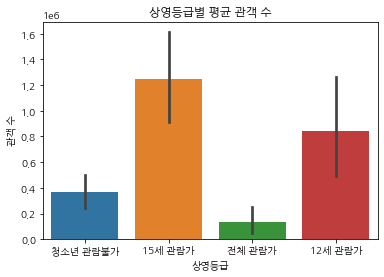

In [18]:
# Boxplot 그리기
ax = plt.subplots()
ax = sns.barplot(x = 'screening_rat', y = 'box_off_num', data = movies)
ax.set_title('상영등급별 평균 관객 수')
ax.set_xlabel('상영등급')
ax.set_ylabel('관객 수')

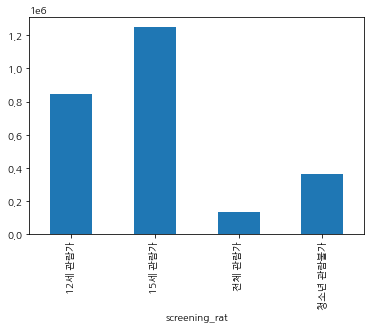

In [19]:
# Histogram 그리기
plt.figure()
screen_aud.plot(kind = 'bar')
plt.show()

##### | 분석 결과
___
- 15세 관람가, 12세 관람가, 청소년 관람불가, 그리고 전체 관람가 순으로 평균 관객 수가 많다.

### **10. 감독별 이전 영화의 평균 관객수와 스탭 수의 관계**
  - 사용한 변수 : `director`, `dir_prev_bfnum`, `num_staff`

In [20]:
# 감독별 이전 영화의 평균 관객 수와 스탭 수 출력
aud_staff = movies.groupby('director')[['dir_prev_bfnum', 'num_staff']].mean()

# 이전에 영화 제작 경험이 없는 감독 제외
aud_staff = aud_staff[aud_staff['dir_prev_bfnum'] != 0]
aud_staff

,dir_prev_bfnum,num_staff
director,,
강우석,4.224105e+05,344.0
강형철,8.030935e+06,577.5
강효진,3.751800e+04,318.0
경순,1.039350e+04,4.0
계윤식,1.468191e+06,258.0
...,...,...
홍원찬,2.888384e+06,264.0
홍지영,6.612205e+05,224.0
황동혁,2.781990e+06,437.0


In [21]:
# 감독별 이전 영화의 평균 관객 수와 스탭 수의 상관관계
aud_staff.corr()

,dir_prev_bfnum,num_staff
dir_prev_bfnum,1.000000,0.300375
num_staff,0.300375,1.000000


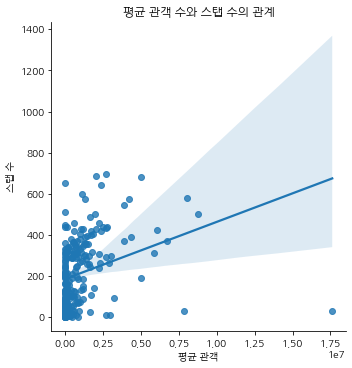

In [24]:
# Scatter Plot 그리기
ax = sns.lmplot(x = 'dir_prev_bfnum', y = 'num_staff', data = aud_staff)
ax.set(title = '평균 관객 수와 스탭 수의 관계')
ax.set(xlabel = '평균 관객')
ax.set(ylabel = '스탭 수')

##### | 분석 결과
___
- 평균 관객 수와 스탭 수의 상관관계가 0.5보다 작은 것으로 보아, 이 두 변수 사이의 특별한 관계가 있다고 보기 어렵다. 